<img src="http://www.ceic.org.ar/spanish/img/siisa-logo.jpg" align='right'>

# Evaluacion sobre cliente 131 (Digiv)
El cliente 131 responde al grafo y la politica evaluada es la numero 3. Tiene relativamente pocos regristros lo que permitira hacer algunas cosas de transformacion de variables sencillas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Export-Politica3-20190301-20190331.csv", low_memory=False)

In [3]:
df.shape

(7266, 137)

In [4]:
df.head()

,executionId,executionDate,executionDateTime,policyId,policyVersion,decisionResult,apellidoNombre,nroDoc,sexo,apellidoNombreSubstring,...,veraz_observacionesMontoCerrada1m,veraz_observacionesMontoCerrada24m,veraz_peorSituacionBureau4m,veraz_peorSituacionBureau5a12m,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado,Unnamed: 136
0,1715351,01/03/2019,00:00,3,36,RECHAZA|Perfil: Score SIISA no es mayor 300 |||,Gigena Juan marcelo,40655982,Masculino,gigena,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1715354,01/03/2019,00:03,3,36,RECHAZA|Perfil: Siisa_Veraz insuficiente 0|||,Lidia Teresa,31525318,Femenino,lidia,...,0.0,0.0,-,-,1.0,1.0,ok,196.0,True,NaN
2,1715355,01/03/2019,00:04,3,36,RECHAZA|Perfil: Score SIISA no es mayor 300 |||,Juan Francisco,37566775,Masculino,juan f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1715356,01/03/2019,00:05,3,36,RECHAZA|Perfil:no trabaja en relación de depen...,Noelia,40163245,Femenino,noelia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1715357,01/03/2019,00:05,3,36,RECHAZA|Perfil: tiene al menos una situación m...,Rivero ariel orlando,25691534,Masculino,rivero,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# tienen toda la misma politica??
df.policyId.unique()

array([3], dtype=int64)

In [6]:
# creo una columna que solo me diga si rechazo o califica.
df['decision_filtered'] = df.decisionResult.str.split("|", n = 1, expand = True)[0]

RECHAZA     6007
CALIFICA    1259
Name: decision_filtered, dtype: int64

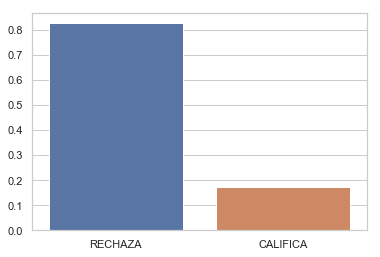

In [7]:
# Simplemente grafico la cantidad que pasa por califica o rechazo.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()

In [8]:
# Genero una nueva columna que tiene que ver con si uso o no veraz por mas que este en dos puntos del arbol.
df['uso_veraz'] = pd.Series(np.repeat('NoUso', len(df.veraz_score)))

In [9]:
# Seteo las ocasiones en las que uso veraz.
df.loc[~df.veraz_score.isna(), 'uso_veraz'] = 'Uso'

In [10]:
# cuento la cantidad de veces que uso.
df.uso_veraz.value_counts()

NoUso    5734
Uso      1532
Name: uso_veraz, dtype: int64

In [13]:
# Tabla de contingencia class(califica/rechaza) / veraz (uso/noUsa) 
pd.crosstab(index=df.uso_veraz,
            columns=df.decision_filtered, margins=True)

decision_filtered,CALIFICA,RECHAZA,All
uso_veraz,,,
NoUso,0,5734,5734
Uso,1259,273,1532
All,1259,6007,7266
